In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [91]:
data = pd.read_csv("market_basket.csv", sep=";")

In [92]:
data

,ID,Product
0,1,Peaches
1,2,Vegetable_Oil
2,2,Frozen_Corn
3,3,Plums
4,4,Pancake_Mix
...,...,...
12930,1361,Hamburger_Buns
12931,1361,Chicken_TV_Dinner
12932,1361,Sweet_Relish
12933,1361,Aspirin


In [93]:
transactions = data.groupby("ID")["Product"].apply(list).tolist()

In [94]:
transactions

[['Peaches'],
 ['Vegetable_Oil', 'Frozen_Corn'],
 ['Plums'],
 ['Pancake_Mix'],
 ['Cheese'],
 ['Cauliflower'],
 ['2pct_Milk'],
 ['98pct_Fat_Free_Hamburger',
  'Potato_Chips',
  'Sesame_Oil',
  'Ice_Cream_Sandwich',
  'Frozen_Cheese_Pizza',
  'Frozen_Sausage_Pizza',
  'Deli_Salad',
  'Brown_Sugar',
  'Corn_Chips',
  'Merlot_Wine',
  'White_Bread',
  'Diet_Cola',
  'Peanut_Butter_Cookies',
  'Pretzels',
  'Lollipops',
  'Baked_Beans',
  'Salt'],
 ['Avocado_Dip'],
 ['Toilet_Paper'],
 ['Apple_Sauce', 'White_Bread'],
 ['Hot_Chocolate', 'Whole_Corn'],
 ['Sugar_Cookies',
  'Onions',
  'Ice_Cream',
  'Instant_Rice',
  'Cantaloupe',
  'Chocolate_Chip_Cookies',
  'Corn_Oil',
  'Corn_Chips',
  'Paper_Plates',
  'Cabbage',
  'Sunglasses',
  'French_Roast_Coffee',
  'Hamburger_Buns',
  'French_Fries',
  'Heavy_Duty_Cleaner',
  'Chicken_Noodle_Soup',
  'Strawberry_Fruit_Roll',
  'Sweet_Potatoes'],
 ['98pct_Fat_Free_Hamburger',
  'Onions',
  'Strawberry_Yogurt',
  'Salsa_Dip',
  'Hot_Dogs',
  'Popcorn

In [68]:
transactions[:5]
print(len(transactions))

1360


In [69]:
encoder = TransactionEncoder()
transactions_encoded = encoder.fit(transactions).transform(transactions)
data_transactions = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

In [70]:
total_transactions = len(transactions)
min_paniers = 30
min_support = min_paniers / total_transactions

In [71]:
frequent_itemsets = apriori(data_transactions, min_support=min_support, use_colnames=True)

In [72]:
print(frequent_itemsets)

      support                                           itemsets
0    0.030147                               (100_Watt_Lightbulb)
1    0.109559                                        (2pct_Milk)
2    0.037500                                (60_Watt_Lightbulb)
3    0.031618                                (75_Watt_Lightbulb)
4    0.093382                         (98pct_Fat_Free_Hamburger)
..        ...                                                ...
960  0.025000  (2pct_Milk, White_Bread, Potato_Chips, Toothpa...
961  0.022059  (Wheat_Bread, 2pct_Milk, White_Bread, Potato_C...
962  0.022059  (Wheat_Bread, 2pct_Milk, White_Bread, Toothpaste)
963  0.022059  (98pct_Fat_Free_Hamburger, White_Bread, Potato...
964  0.022059        (Potato_Chips, White_Bread, Eggs, Potatoes)

[965 rows x 2 columns]


In [73]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.15)

In [74]:
rules[["antecedents", "consequents", "support", "confidence", "lift"]]

,antecedents,consequents,support,confidence,lift
0,(2pct_Milk),(98pct_Fat_Free_Hamburger),0.038235,0.348993,3.737251
1,(98pct_Fat_Free_Hamburger),(2pct_Milk),0.038235,0.409449,3.737251
2,(AA_Cell_Batteries),(2pct_Milk),0.022059,0.697674,6.368035
3,(2pct_Milk),(AA_Cell_Batteries),0.022059,0.201342,6.368035
4,(2pct_Milk),(Apple_Fruit_Roll),0.022059,0.201342,6.368035
...,...,...,...,...,...
2557,"(Eggs, Potatoes)","(Potato_Chips, White_Bread)",0.022059,0.483871,9.400922
2558,(Potato_Chips),"(White_Bread, Eggs, Potatoes)",0.022059,0.225564,7.303974
2559,(White_Bread),"(Potato_Chips, Eggs, Potatoes)",0.022059,0.185185,6.806807
2560,(Eggs),"(Potato_Chips, White_Bread, Potatoes)",0.022059,0.179641,6.603010


In [75]:
data2 = pd.read_csv("Fromages.csv", sep=";")

In [76]:
data2

,Fromages,Calories,Sodium,Calcium,Lipides,Retinol,Folates,Proteines,Cholesterol,Magnesium
0,CarreDelEst,314,"353,5","72,6","26,3","51,6","30,3",21,70,20
1,Babybel,314,238,"209,8","25,1","63,7","6,4","22,6",70,27
2,Beaufort,401,112,"259,4","33,3","54,9","1,2","26,6",120,41
3,Bleu,342,336,"211,1","28,9","37,1","27,5","20,2",90,27
4,Camembert,264,314,"215,9","19,5",103,"36,4","23,4",60,20
5,Cantal,367,256,264,"28,8","48,8","5,7",23,90,30
6,Chabichou,344,192,"87,2","27,9","90,1","36,3","19,5",80,36
7,Chaource,292,276,"132,9","25,4","116,4","32,5","17,8",70,25
8,Cheddar,406,172,"182,3","32,5","76,4","4,9",26,110,28
9,Comte,399,92,"220,5","32,4","55,9","1,3","29,2",120,51


In [77]:
data2.dtypes

Fromages       object
Calories        int64
Sodium         object
Calcium        object
Lipides        object
Retinol        object
Folates        object
Proteines      object
Cholesterol     int64
Magnesium       int64
dtype: object

In [78]:
data2["Sodium"] = data2["Sodium"].str.replace("," , ".")
data2["Calcium"] = data2["Calcium"].str.replace("," , ".")
data2["Lipides"] = data2["Lipides"].str.replace("," , ".")
data2["Retinol"] = data2["Retinol"].str.replace("," , ".")
data2["Folates"] = data2["Folates"].str.replace("," , ".")
data2["Proteines"] = data2["Proteines"].str.replace("," , ".")

In [79]:
data2["Sodium"] = pd.to_numeric(data2["Sodium"], errors="coerce")
data2["Calcium"] = pd.to_numeric(data2["Calcium"], errors="coerce")
data2["Lipides"] = pd.to_numeric(data2["Lipides"], errors="coerce")
data2["Retinol"] = pd.to_numeric(data2["Retinol"], errors="coerce")
data2["Folates"] = pd.to_numeric(data2["Folates"], errors="coerce")
data2["Proteines"] = pd.to_numeric(data2["Proteines"], errors="coerce")

C:\Users\ryann\AppData\Local\Temp\ipykernel_13908\2179665127.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data2.corr()


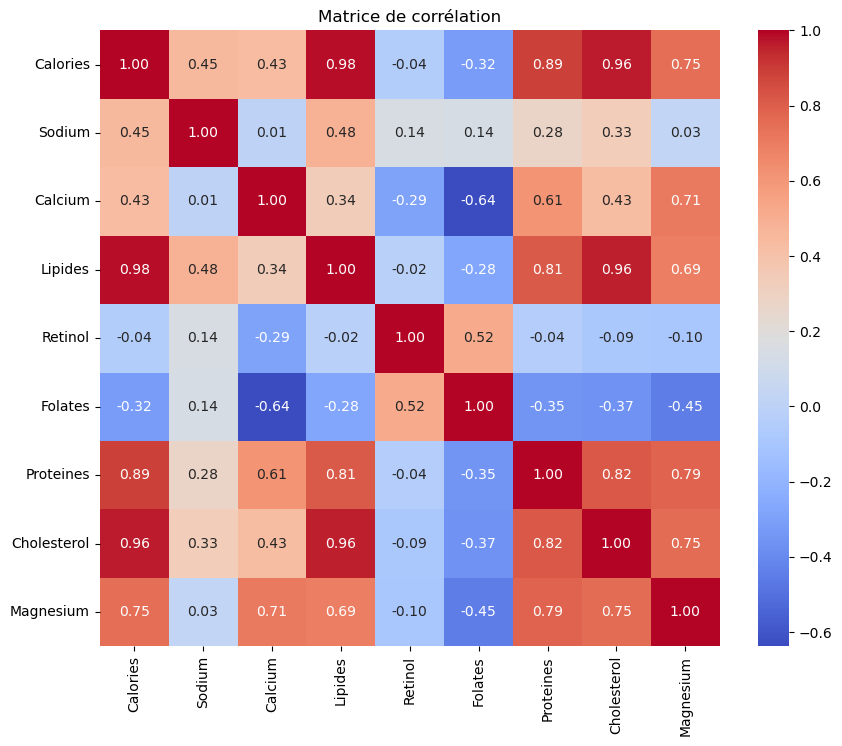

In [80]:
correlation_matrix = data2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [81]:
for col in data2.columns[1:]:
    median = data2[col].median()
    data2[col] = (data2[col] > median).astype(int)

In [82]:
transactions = []

for index, row in data2.iterrows():
    transaction = [row["Fromages"]]
    for col in data2.columns[1:]:
        if row[col] == 1:
            transaction.append(col)
    transactions.append(transaction)

In [83]:
encoder = TransactionEncoder()
transactions_encoded = encoder.fit(transactions).transform(transactions)
data2_transactions = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

In [84]:
min_support = 5 / len(transactions)

In [85]:
frequent_itemsets = apriori(data2_transactions, min_support=min_support, use_colnames=True)

In [86]:
frequent_itemsets

,support,itemsets
0,0.482759,(Calcium)
1,0.448276,(Calories)
2,0.310345,(Cholesterol)
3,0.482759,(Folates)
4,0.482759,(Lipides)
...,...,...
81,0.172414,"(Lipides, Cholesterol, Proteines, Magnesium)"
82,0.206897,"(Magnesium, Calories, Lipides, Cholesterol, Ca..."
83,0.206897,"(Magnesium, Calories, Proteines, Lipides, Calc..."
84,0.172414,"(Magnesium, Calories, Lipides, Sodium, Calcium)"


In [87]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.60)

In [88]:
rules[["antecedents", "consequents", "support", "confidence", "lift"]]

,antecedents,consequents,support,confidence,lift
0,(Calories),(Calcium),0.310345,0.692308,1.434066
1,(Calcium),(Calories),0.310345,0.642857,1.434066
2,(Cholesterol),(Calcium),0.206897,0.666667,1.380952
3,(Lipides),(Calcium),0.310345,0.642857,1.331633
4,(Calcium),(Lipides),0.310345,0.642857,1.331633
...,...,...,...,...,...
333,"(Calories, Lipides, Proteines)","(Cholesterol, Magnesium)",0.172414,0.625000,2.589286
334,"(Calories, Cholesterol, Proteines)","(Lipides, Magnesium)",0.172414,0.833333,2.196970
335,"(Lipides, Cholesterol, Proteines)","(Calories, Magnesium)",0.172414,0.833333,2.196970
336,"(Cholesterol, Magnesium)","(Calories, Lipides, Proteines)",0.172414,0.714286,2.589286
